# Redes Adaline

* Adaptive Linear Neuron
* 1960 - Widrow e Holf
* Alimentação adiante
* Minimizar o erro quadrático de todo o conjunto de amostras
* Vetor gradiente -> aponta para o crescimento da função

<img src="images/adaline.png">

<img src="images/gradiente.png">

* Regra delta: o ajuste nos pesos deve se dar no sentido contrário do gradiente

In [1]:
import numpy as np
import matplotlib.pyplot as plt

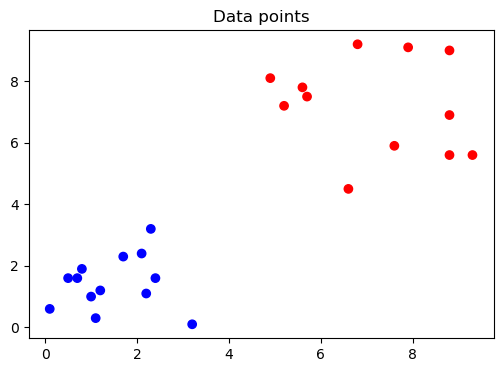

In [18]:
# Dataset
x = np.array([[1.0, 1.0], [2.1, 2.4], [1.1, 0.3], [2.3, 3.2], [0.1, 0.6],
              [0.5, 1.6], [1.7, 2.3], [0.7, 1.6], [3.2, 0.1], [2.2, 1.1],
              [0.8, 1.9], [2.4, 1.6], [1.2, 1.2], [5.2, 7.2], [6.6, 4.5],
              [4.9, 8.1], [7.6, 5.9], [8.8, 9.0], [5.6, 7.8], [8.8, 5.6],
              [7.9, 9.1], [6.8, 9.2], [8.8, 6.9], [9.3, 5.6], [5.7, 7.5]
             ])

d = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

shuffle = np.random.permutation(len(x))
x = x[shuffle]
d = d[shuffle]

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [19]:
class Adaline:
    # Construtor, define taxa de aprendizado e a taxa de erro aceita para convergir
    def __init__(self, lr, e):
        self.lr = lr
        self.e = e
    
    # Função de ativação, 1 se value > 0, -1 senão
    def activation(self, value):
        return (1 if value >= 0 else -1)
    
    # Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    # Calcula a diferença entre o valor real e o valor predito
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    def train(self, x, d):
        # Definir aleatoriamente os pesos, o bias e o peso do bias
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()

        epoch = 0
        self.total_mse = []
        last_mse = np.inf

        # Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        while True:
            mse = 0

            for xi, target in zip(x,d):
                predicted = self.predict(xi)
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)

                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias

            mse = (mse/len(x))
            print(f"EPOCA: {epoch}\t- MSE_atual: {mse}\t- MSE_anterior - MSE_atual: {abs(last_mse - mse)}")
            
            if abs(last_mse - mse) <= self.e:
                break

            self.total_mse.append(mse)
            last_mse = mse
            epoch += 1

    #  Função de teste, realiza previsões para um conjunto de dados de entrada
    def test(self, x):
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

In [20]:
rede = Adaline(lr = 0.01, e = 1e-4)
rede.train(x = x, d = d)

EPOCA: 0	- MSE_atual: 1.0871196265043104	- MSE_anterior - MSE_atual: inf
EPOCA: 1	- MSE_atual: 0.43839092368084875	- MSE_anterior - MSE_atual: 0.6487287028234616
EPOCA: 2	- MSE_atual: 0.32688382475734684	- MSE_anterior - MSE_atual: 0.11150709892350191
EPOCA: 3	- MSE_atual: 0.2657075384961406	- MSE_anterior - MSE_atual: 0.06117628626120625
EPOCA: 4	- MSE_atual: 0.22998420963968222	- MSE_anterior - MSE_atual: 0.035723328856458375
EPOCA: 5	- MSE_atual: 0.20759950766432425	- MSE_anterior - MSE_atual: 0.022384701975357968
EPOCA: 6	- MSE_atual: 0.19256586498378428	- MSE_anterior - MSE_atual: 0.015033642680539971
EPOCA: 7	- MSE_atual: 0.18185285420982894	- MSE_anterior - MSE_atual: 0.01071301077395534
EPOCA: 8	- MSE_atual: 0.17387045811649685	- MSE_anterior - MSE_atual: 0.007982396093332095
EPOCA: 9	- MSE_atual: 0.16774087087381148	- MSE_anterior - MSE_atual: 0.006129587242685364
EPOCA: 10	- MSE_atual: 0.16294692624196813	- MSE_anterior - MSE_atual: 0.00479394463184335
EPOCA: 11	- MSE_atual: 

In [21]:
x_teste = np.array([[1, 4], [3, 1], [3, 2], [5, 5], [6, 7], [4, 8]])
teste_resultado = rede.test(x_teste)
teste_resultado

[-1, -1, -1, 1, 1, 1]

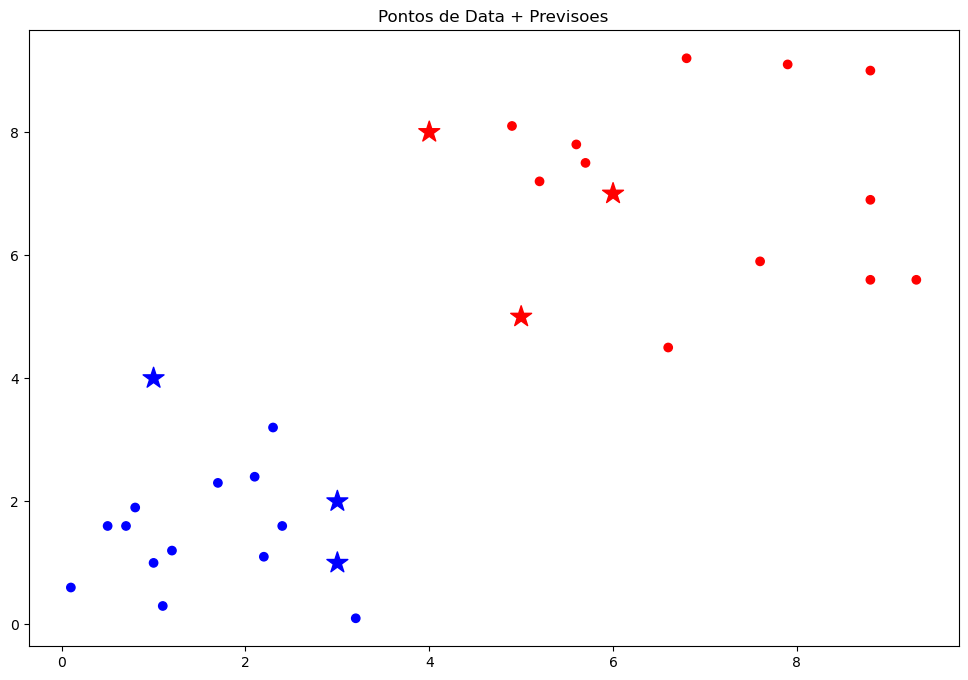

In [22]:
plt.figure(figsize=(12,8))
plt.title("Pontos de Data + Previsoes")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

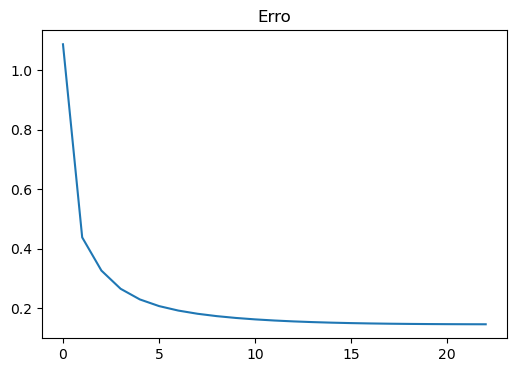

In [23]:
plt.figure(figsize=(6,4))
plt.title("Erro")
plt.plot(rede.total_mse)
plt.show()